In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

fname = "root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root"
events = NanoEventsFactory.from_root(
    {fname: "Events"},
    schemaclass=NanoAODSchema,
    metadata={"dataset": "DoubleMuon"},
).events()

print("Number of events = ", ak.num(events.Muon, axis=0).compute())

/usr/local/venv/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


Number of events =  2147195


In [2]:
(ak.num(events.Muon,axis=1)==2).compute()

<Array [False, False, True, ..., False, True, False] type='2147195 * bool'>

In [5]:
simple2muEvents = events[ak.num(events.Muon, axis=1) == 2]
#print(simple2muEvents.compute())
print("Number of events with simply 2 muons = ", ak.num(simple2muEvents.Muon, axis=0).compute())

Number of events with simply 2 muons =  1124805


In [6]:
simple2mu = simple2muEvents.Muon[:,0] + simple2muEvents.Muon[:,1]

In [15]:
m2mu=simple2mu.mass.compute()
m2mu

<Array [21.7, 16.9, 13.6, 11.8, ..., 46.9, 27.9, 88.5] type='1124805 * float32'>

In [19]:
type(m2mu)

awkward.highlevel.Array

In [49]:
import hist
import matplotlib.pyplot as plt   #TODO move these up
%matplotlib inline
histogram = hist.Hist.new.Reg(1000, 0, 200,
                              name="m2mu", label="m2mu [GeV]").Weight()

In [50]:
print(histogram.ndim)
print()

print(histogram.axes)

1

(Regular(1000, 0, 200, name='m2mu', label='m2mu [GeV]'),)


In [51]:
histogram.fill(m2mu=m2mu)

Hist(Regular(1000, 0, 200, name='m2mu', label='m2mu [GeV]'), storage=Weight()) # Sum: WeightedSum(value=1.12186e+06, variance=1.12186e+06) (WeightedSum(value=1.1248e+06, variance=1.1248e+06) with flow)

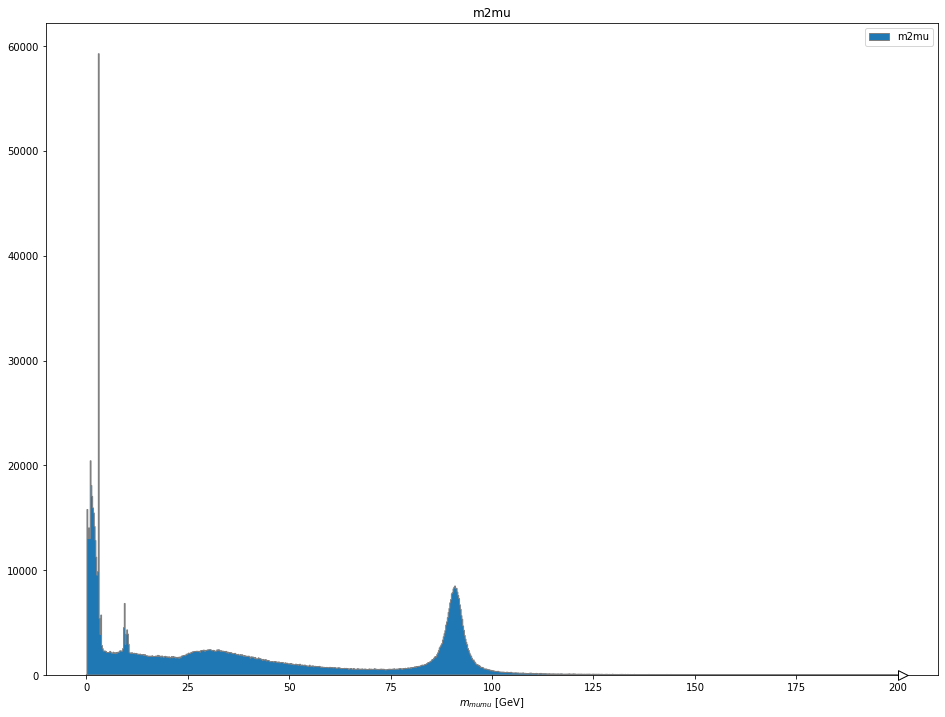

In [52]:
plt.figure(figsize=(16,12))
histogram.plot(histtype="fill", linewidth=1, edgecolor="grey", label='m2mu')
plt.legend()
plt.title("m2mu")
plt.xlabel("$m_{mumu}$ [GeV]");
plt.show()